# Input module examples

This is not yet perfect, but is getting there and will improve with further usage. 

The dataframes which are returned are designed to reflect MAGICC's underlying data input format with a few tweaks to make things uniform. When we have incorporated pint with units, we can use `df.quantify()` and `df.dequantify()` to quickly add/remove units to our dataframes and swiftly do conversions etc. 

In [1]:
%matplotlib inline

from os import listdir
from os.path import join, dirname
from pprint import pprint

import pandas as pd
import pymagicc
from pymagicc.io import MAGICCData, read_cfg_file, NoReaderWriterError
import matplotlib.pyplot as plt
plt.style.use('bmh') 


import expectexception

In [2]:
MAGICC6_DIR = join("..", "pymagicc", "MAGICC6", "run")

## Read files

In [3]:
mdata = MAGICCData()
mdata.read(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN")
mdata.head()

VARIABLE CO2I_EMIS                         
TODO           SET                         
UNITS          GtC                         
REGION      R5OECD R5REF R5ASIA R5MAF R5LAM
YEAR                                       
1765         0.003   0.0    0.0   0.0   0.0
1766         0.003   0.0    0.0   0.0   0.0
1767         0.003   0.0    0.0   0.0   0.0
1768         0.003   0.0    0.0   0.0   0.0
1769         0.003   0.0    0.0   0.0   0.0

In [4]:
pprint(mdata.metadata)

{'contact': 'Base year emissions inventories: Steve Smith (ssmith@pnl.gov) and '
            'Jean-Francois Lamarque (Jean-Francois.Lamarque@noaa.gov); RCP '
            '3-PD (IMAGE): Detlef van Vuuren (detlef.vanvuuren@pbl.nl); RCP '
            '4.5 (MiniCAM): Allison Thomson (Allison.Thomson@pnl.gov); RCP 6.0 '
            '(AIM): Toshihiko Masui (masui@nies.go.jp); RCP 8.5 (MESSAGE): '
            'Keywan Riahi (riahi@iiasa.ac.at); Concentrations & Forcing '
            'compilation: Malte Meinshausen (malte.meinshausen@pik-potsdam.de)',
 'data': 'Historical fossil&industrial CO2 (CO2I) Emissions '
         '(HISTRCP_CO2I_EMIS)',
 'header': 'RCPTOOL - MAGICC 6.X DATA FILE \r\n'
           'VERSION:   ALPHA - FIRST DRAFT - PRIMAP xls file written on 02 Sep '
           '2009, 17:04:37 \r\n'
           ' \r\n'
           ' \r\n'
           'DATA:  Historical fossil&industrial CO2 (CO2I) Emissions '
           '(HISTRCP_CO2I_EMIS) \r\n'
           'SOURCE:  RCP data as presented on '

## Accessors

`MAGICCData` is built to make data accessing as simple as possible. As we have unique keys for each of our headers, we allow users to select data simply using lists, without specifying what each value should correspond to etc. (essentially we hide away all the pandas fiddly stuff).

Of course the underlying dataframe is always accessible via the `.df` attribute.

In [5]:
mdata['CO2I_EMIS'].head(2)

VARIABLE CO2I_EMIS                         
TODO           SET                         
UNITS          GtC                         
REGION      R5OECD R5REF R5ASIA R5MAF R5LAM
YEAR                                       
1765         0.003   0.0    0.0   0.0   0.0
1766         0.003   0.0    0.0   0.0   0.0

In [6]:
mdata['R5ASIA', 'CO2I_EMIS'].head(2)

VARIABLE,CO2I_EMIS
TODO,SET
UNITS,GtC
REGION,R5ASIA
YEAR,
1765,0.0
1766,0.0


In [7]:
# changing order doesn't matter
mdata['CO2I_EMIS', 'R5ASIA'].head(2)

VARIABLE,CO2I_EMIS
TODO,SET
UNITS,GtC
REGION,R5ASIA
YEAR,
1765,0.0
1766,0.0


In [8]:
%%expect_exception KeyError
# the above doesn't work on the raw dataframe
# because you need to specify all the levels 
# in the right order
mdata.df['R5ASIA', 'CO2I_EMIS']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-8-b7d9f3057b51> in <module>()
      2 # because you need to specify all the levels
      3 # in the right order
----> 4 mdata.df['R5ASIA', 'CO2I_EMIS']

~/Documents/AGCEC/MCastle/pymagicc/venv/lib/python3.6/site-packages/pandas/core/frame.py in __getitem__(self, key)
   2699         if is_single_key:
   2700             if self.columns.nlevels > 1:
-> 2701                 return self._getitem_multilevel(key)
   2702             indexer = self.columns.get_loc(key)
   2703             if is_integer(indexer):

~/Documents/AGCEC/MCastle/pymagicc/venv/lib/python3.6/site-packages/pandas/core/frame.py in _getitem_multilevel(self, key)
   2745 
   2746     def _getitem_multilevel(self, key):
-> 2747         loc = self.columns.get_loc(key)
   2748         if isinstance(loc, (slice, Series, np.ndarray, Index)):
   2749             

In [9]:
# can also put index values in
mdata[1956, 'CO2I_EMIS', 'R5ASIA'].head(2)

VARIABLE,CO2I_EMIS
TODO,SET
UNITS,GtC
REGION,R5ASIA
YEAR,
1956,0.110425


In [10]:
%%expect_exception TypeError
# although slicing fails, one for the to do list...
mdata[1956:1970, 'CO2I_EMIS', 'R5ASIA'].head(2)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
~/Documents/AGCEC/MCastle/pymagicc/venv/lib/python3.6/site-packages/pandas/core/indexes/base.py in get_loc(self, key, method, tolerance)
   3108             try:
-> 3109                 return self._engine.get_loc(key)
   3110             except KeyError:

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 1956

During handling of the above exception, another exception occurred:

KeyError                                  Traceback (most recent call last)
~/Documents/AGCEC/MCastle/pymagicc/venv/lib/python3.6/site-packages/pandas/core/indexes/multi.py in _g

In [11]:
mdata[1998]

VARIABLE CO2I_EMIS                                        
TODO           SET                                        
UNITS          GtC                                        
REGION      R5OECD     R5REF    R5ASIA     R5MAF     R5LAM
YEAR                                                      
1998      3.184738  0.853781  1.648214  0.522509  0.378757

### Reading SCEN files

We can also read SCEN files. These are particularly tricky as the underlying data format is unique.

In [12]:
mdata.read(MAGICC6_DIR, "RCP45.SCEN")
mdata.df.head()

VARIABLE,CO2I_EMIS,CO2B_EMIS,CH4_EMIS,N2O_EMIS,SOX_EMIS,CO_EMIS,NMVOC_EMIS,NOX_EMIS,BC_EMIS,OC_EMIS,...,C6F14_EMIS,HFC23_EMIS,HFC32_EMIS,HFC4310_EMIS,HFC125_EMIS,HFC134A_EMIS,HFC143A_EMIS,HFC227EA_EMIS,HFC245FA_EMIS,SF6_EMIS
TODO,SET,SET,SET,SET,SET,SET,SET,SET,SET,SET,...,SET,SET,SET,SET,SET,SET,SET,SET,SET,SET
UNITS,GtC,GtC,MtCH4,MtN2O-N,MtS,MtCO,Mt,MtN,Mt,Mt,...,kt,kt,kt,kt,kt,kt,kt,kt,kt,kt
REGION,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,...,BUNKERS,BUNKERS,BUNKERS,BUNKERS,BUNKERS,BUNKERS,BUNKERS,BUNKERS,BUNKERS,BUNKERS
YEAR,,,,,,,,,,,,,,,,,,,,,
2000,6.735,1.1488,300.2070,7.4567,53.8413,1068.0009,210.6230,38.1623,7.8048,35.5434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,6.896,1.1320,303.4093,7.5029,54.4192,1066.7447,211.5938,38.2888,7.8946,35.7143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,6.949,1.2317,306.5787,7.5487,54.9960,1065.4692,212.5632,38.4153,7.9841,35.8846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,7.286,1.2256,309.7165,7.5942,55.5716,1064.1742,213.5311,38.5418,8.0734,36.0543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,7.672,1.2428,312.8241,7.6394,56.1461,1062.8596,214.4977,38.6683,8.1624,36.2233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
mdata["BC_EMIS", "R5ASIA"].head()

VARIABLE,BC_EMIS
TODO,SET
UNITS,Mt
REGION,R5ASIA
YEAR,
2000,3.0468
2001,3.1090
2002,3.1818
2003,3.2546
2004,3.3274


### Reading all files in run directory

The lines below show how you can read every file in the run directory into a dictionary, should you wish to.

In [14]:
all_run_files = {}

for file in listdir(MAGICC6_DIR):
    if file.endswith((".exe")):
        continue
    elif file.endswith(".CFG"):
        all_run_files[file] = read_cfg_file(
            join(MAGICC6_DIR, file)
        )
    else:
        mdata = MAGICCData()
        mdata.read(MAGICC6_DIR, file)
        all_run_files[file] = mdata

In [15]:
all_run_files.keys()

dict_keys(['EDGAR_NOXB_EMIS.IN', 'EDGAR_NOXI_EMIS.IN', 'GISS_BCB_OT.IN', 'GISS_BCB_RF.IN', 'GISS_BCI_OT.IN', 'GISS_BCI_RF.IN', 'GISS_BCSNOW_RF.IN', 'GISS_LANDUSE_RF.IN', 'GISS_NOX_RF.IN', 'GISS_OCB_OT.IN', 'GISS_OCB_RF.IN', 'GISS_OCI_OT.IN', 'GISS_OCI_RF.IN', 'GISS_OCN_OT.IN', 'GISS_SOX_RF.IN', 'GISS_SOXI_OT.IN', 'GISS_SOXNB_OT.IN', 'GISS_SS_OT.IN', 'HIST_SOXN_EMIS.IN', 'HIST_VOLCANIC_RF.MON', 'HISTRCP2009_SOLAR_RF.IN', 'HISTRCP45_SOLAR_RF.IN', 'HISTRCP45SCP45to3PD_SOLAR_RF.IN', 'HISTRCP60_2300_SOLAR_RF.IN', 'HISTRCP6_SOLAR_RF.IN', 'HISTRCP6SCP6to45_SOLAR_RF.IN', 'HISTRCP85_SOLAR_RF.IN', 'HISTRCP_BCB_EMIS.IN', 'HISTRCP_BCI_EMIS.IN', 'HISTRCP_C2F6_CONC.IN', 'HISTRCP_C2F6_EMIS.IN', 'HISTRCP_C6F14_CONC.IN', 'HISTRCP_C6F14_EMIS.IN', 'HISTRCP_C6F14I_EMIS.IN', 'HISTRCP_CF4_CONC.IN', 'HISTRCP_CF4_EMIS.IN', 'HISTRCP_CH4_CONC.IN', 'HISTRCP_CH4B_EMIS.IN', 'HISTRCP_CH4I_EMIS.IN', 'HISTRCP_CO2_CONC.IN', 'HISTRCP_CO2B_EMIS.IN', 'HISTRCP_CO2I_EMIS.IN', 'HISTRCP_COB_EMIS.IN', 'HISTRCP_COI_EMIS.IN', '

In [16]:
all_run_files["SRESB2.SCEN"].head(4)

VARIABLE,CO2I_EMIS,CO2B_EMIS,CH4_EMIS,N2O_EMIS,SOX_EMIS,CO_EMIS,NMVOC_EMIS,NOX_EMIS,CF4_EMIS,C2F6_EMIS,...,C4F10_EMIS,HFC23_EMIS,HFC32_EMIS,HFC4310_EMIS,HFC125_EMIS,HFC134A_EMIS,HFC143A_EMIS,HFC227EA_EMIS,HFC245FA_EMIS,SF6_EMIS
TODO,SET,SET,SET,SET,SET,SET,SET,SET,SET,SET,...,SET,SET,SET,SET,SET,SET,SET,SET,SET,SET
UNITS,GtC,GtC,MtCH4,MtN2O-N,MtS,MtCO,Mt,MtN,kt,kt,...,kt,kt,kt,kt,kt,kt,kt,kt,kt,kt
REGION,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,WORLD,...,ALM,ALM,ALM,ALM,ALM,ALM,ALM,ALM,ALM,ALM
YEAR,,,,,,,,,,,,,,,,,,,,,
1990,5.9911,1.1068,309.6788,6.6751,70.9238,879.0190,139.1058,30.9273,15.7893,1.5789,...,0.0,0.0628,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4743
2000,6.8963,1.0745,322.9364,7.0151,69.0477,877.1473,141.4149,32.0014,12.6000,1.2600,...,0.0,0.1325,0.0000,0.0000,0.0000,5.0000,0.0000,0.0000,0.0000,0.7000
2010,7.9890,0.7952,348.9173,6.2087,65.8975,934.9175,159.2418,36.7336,20.9684,2.0968,...,0.0,0.1970,0.4136,0.1391,1.3673,19.6006,1.0341,1.5078,6.3409,0.8007
2020,9.0177,0.0324,383.9083,6.0598,61.2858,1022.4459,180.2369,42.6658,27.0817,2.7082,...,0.0,0.0884,0.7356,0.2115,2.4347,33.9153,1.8389,2.5867,10.4807,1.0643


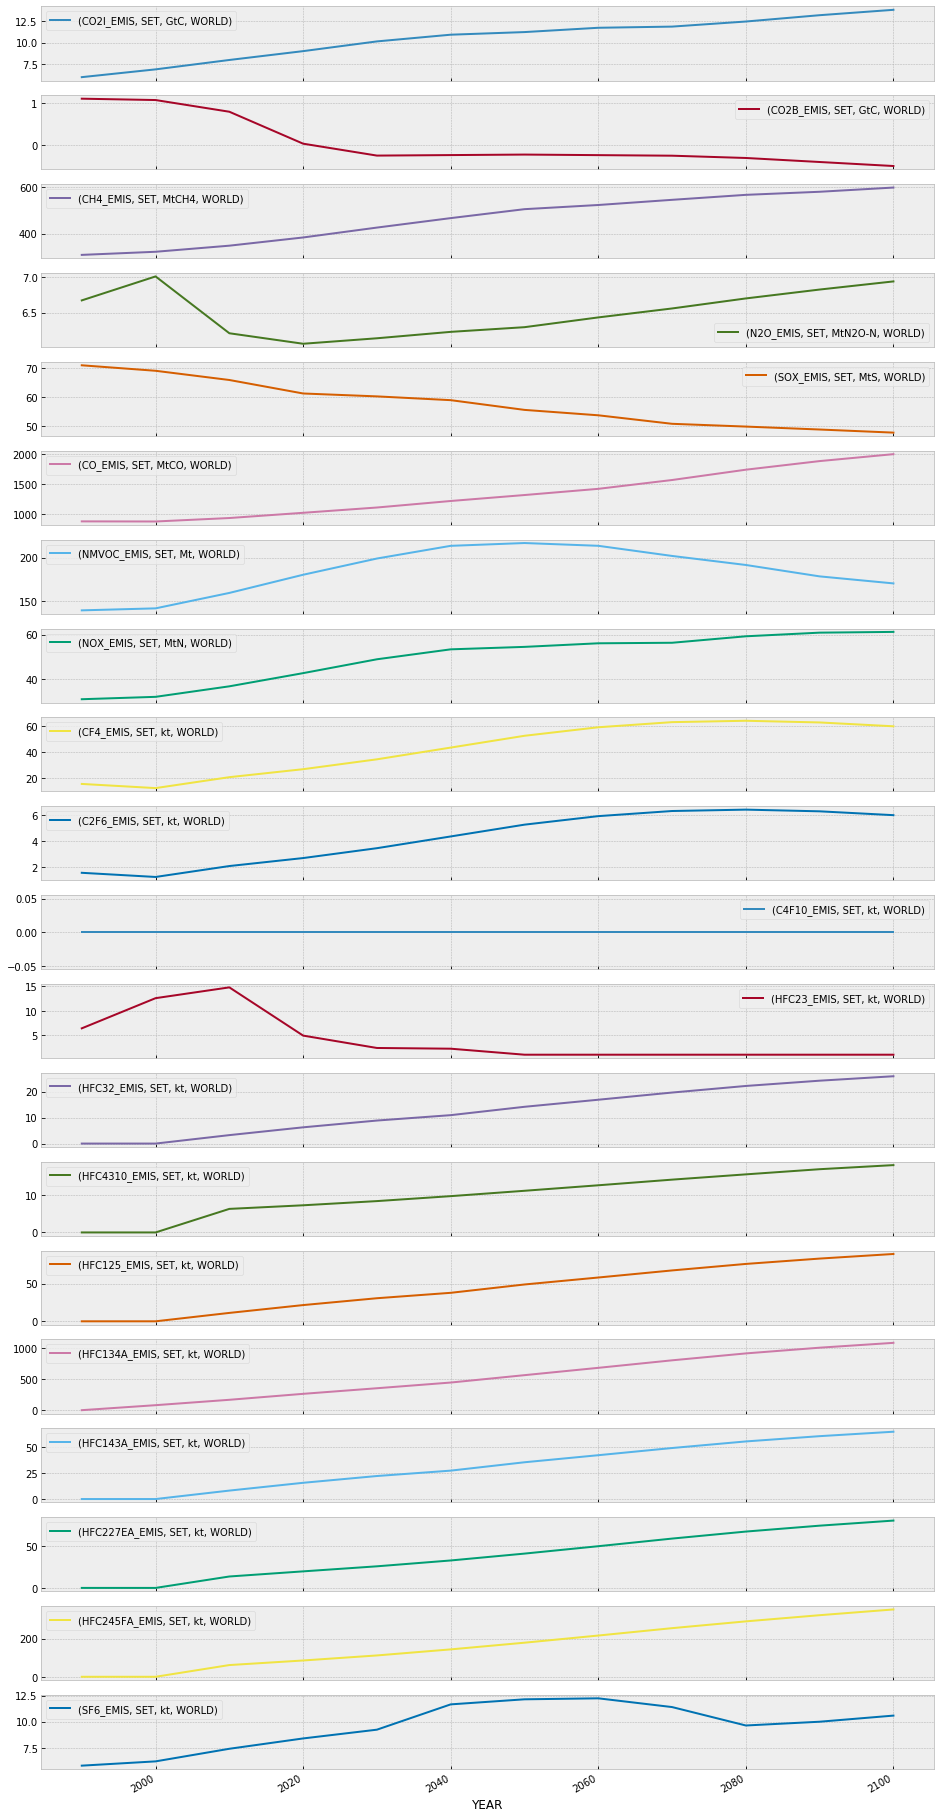

In [17]:
all_run_files["SRESB2.SCEN"]["WORLD"].plot(figsize=(16, 36), subplots=True);

## Writing files

Once you have your data in the format as above, writing files is trivial. 

In [18]:
mdata.read(MAGICC6_DIR, "HISTRCP_CO2I_EMIS.IN")
mdata.write("HISTEXAMPLE_CO2I_EMIS.IN")

mdata.read(MAGICC6_DIR, "RCP45.SCEN")
mdata.write("SCENEXAMPLE.SCEN", filepath='.')

However, note that the format to write in is determined by the filename. Hence you can't just use any filename, it has to follow MAGICC's internal conventions. Our error messaging will hopefully make this slightly clearer.

In [19]:
%%expect_exception NoReaderWriterError
mdata.write("histexample.txt")

---------------------------------------------------------------------------
NoReaderWriterError                       Traceback (most recent call last)
<ipython-input-19-bd740518740c> in <module>()
----> 1 mdata.write("histexample.txt")

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in write(self, filename_to_write, filepath)
   1606             the current working directory is used.
   1607         """
-> 1608         writer = self.determine_tool(filename_to_write, "writer")()
   1609         writer.write(self, filename_to_write, filepath)
   1610 

~/Documents/AGCEC/MCastle/pymagicc/pymagicc/io.py in determine_tool(self, filename, tool_to_get)
   1733             )
   1734 
-> 1735         raise NoReaderWriterError(error_msg)
   1736 
   1737 

NoReaderWriterError: Couldn't find appropriate writer for histexample.txt.
The file must be one of the following types and the filename must match its corresponding regular expression:
SCEN: ^.*\.SCEN$
SCEN7: ^.*\.SCEN7$
prn: ^.*\.prn$
Emi